In [1]:
import pandas as pd

In [16]:
movies_df = pd.read_csv("movie_lens_small_several_rows.csv")
movies_df

,movieId,userId,rating,genre_encoded
0,1,1,4.0,0
1,1,1,4.0,1
2,1,1,4.0,2
3,1,1,4.0,3
4,1,5,4.0,0
...,...,...,...,...
235314,193583,184,3.5,2
235315,193583,184,3.5,3
235316,193585,184,3.5,5
235317,193587,184,3.5,6


In [19]:
movies_df['userId'].count()

235319

In [23]:
enc_movie = {movide_id: i+1 for i, movide_id in enumerate(movies_df["movieId"].unique())}
movies_df['movieId'] = movies_df['movieId'].map(enc_movie)
movies_df

,movieId,userId,rating,genre_encoded
0,1,1,4.0,0
1,1,1,4.0,1
2,1,1,4.0,2
3,1,1,4.0,3
4,1,5,4.0,0
...,...,...,...,...
235314,9049,184,3.5,2
235315,9049,184,3.5,3
235316,9050,184,3.5,5
235317,9051,184,3.5,6


In [24]:
enc_movie = {movide_id: i+1 for i, movide_id in enumerate(movies_df["userId"].unique())}
movies_df['userId'] = movies_df['userId'].map(enc_movie)
movies_df

,movieId,userId,rating,genre_encoded
0,1,1,4.0,0
1,1,1,4.0,1
2,1,1,4.0,2
3,1,1,4.0,3
4,1,2,4.0,0
...,...,...,...,...
235314,9049,610,3.5,2
235315,9049,610,3.5,3
235316,9050,610,3.5,5
235317,9051,610,3.5,6


In [25]:
movie_data = movies_df[['userId', 'movieId','genre_encoded']]
movie_data.to_csv('movie_data.txt', sep='\t', index=False, header = None)

In [26]:
max(movies_df['movieId'])

9052

In [11]:
test_df = movies_df.sample(frac = 0.2)
train_df = movies_df.drop(test_df.index)
print(len(train_df), len(test_df))

188255 47064


In [12]:
train_df_i = train_df[['userId', 'movieId','genre_encoded']]
train_df_v = train_df[['rating']]
train_df_i.to_csv('train_idx.txt', sep='\t', index=False, header = None)
train_df_v.to_csv('train_v.txt', sep='\t', index=False,header = None)

In [13]:
test_df_i = test_df[['userId', 'movieId','genre_encoded']]
test_df_v = test_df[['rating']]
test_df_i.to_csv('test_idx.txt', sep='\t', index=False, header = None)
test_df_v.to_csv('test_v.txt', sep='\t', index=False,header = None)

In [20]:
print(train_df_i[train_df_i['userId'] == 6057])

Empty DataFrame
Columns: [userId, movieId, genre_encoded]
Index: []


# combine the result from Costco with test dataset

In [3]:
import pandas as pd

In [6]:
movie_data = pd.read_csv("movie_data.txt", sep='\t', header=None)
rating_data = pd.read_csv("costco_result_20.csv", sep='\t', header=None)

In [8]:
join_data = pd.concat([movie_data, rating_data], axis=1)
join_data

,0,1,2,0
0,1,1,0,4.665255
1,1,1,1,4.652157
2,1,1,2,4.656086
3,1,1,3,4.414572
4,2,1,0,4.384177
...,...,...,...,...
235314,610,9049,2,4.164322
235315,610,9049,3,4.086768
235316,610,9050,5,3.972096
235317,610,9051,6,3.735224


# Generating plot base on the result

In [9]:
join_data.to_csv('join_movie_data.csv', sep='\t', index=False, header = None)

In [2]:
import pandas as pd

In [31]:
data = pd.read_csv("../data-2.csv")
data

,6-6-6,6-6-7,6-6-8,6-6-9,6-7-6,6-7-7,6-7-8,6-7-9,6-8-6,6-8-7,...,10-9-6,10-9-7,10-9-8,10-9-9,10-9-10,10-10-6,10-10-7,10-10-8,10-10-9,10-10-10
0,1374.746172,1374.530556,1374.433503,1374.401008,1364.836598,1364.569348,1364.336760,1364.201417,1358.838211,1354.651393,...,1348.341987,1344.398375,1343.799163,1343.483606,1343.359950,1341.946330,1337.599482,1336.635233,1335.778753,1335.633689
1,0.107846,0.107986,0.108049,0.108070,0.114277,0.114450,0.114601,0.114689,0.118170,0.120887,...,0.124981,0.127541,0.127929,0.128134,0.128214,0.129132,0.131953,0.132578,0.133134,0.133228


In [29]:
pd.DataFrame(data['6-6-6'])

,6-6-6
0,1374.746172
1,0.107846


In [14]:
error = []
variance = []
label = []
for i in range(6,11):
    for j in range(6,11):
        for k in range(6,11):
            if str(i)+'-'+str(j)+'-'+str(k) not in ['6-6-10']:
                label.append(str(i)+'-'+str(j)+'-'+str(k))
                error.append(data[str(i)+'-'+str(j)+'-'+str(k)][0])
                variance.append(data[str(i)+'-'+str(j)+'-'+str(k)][1])


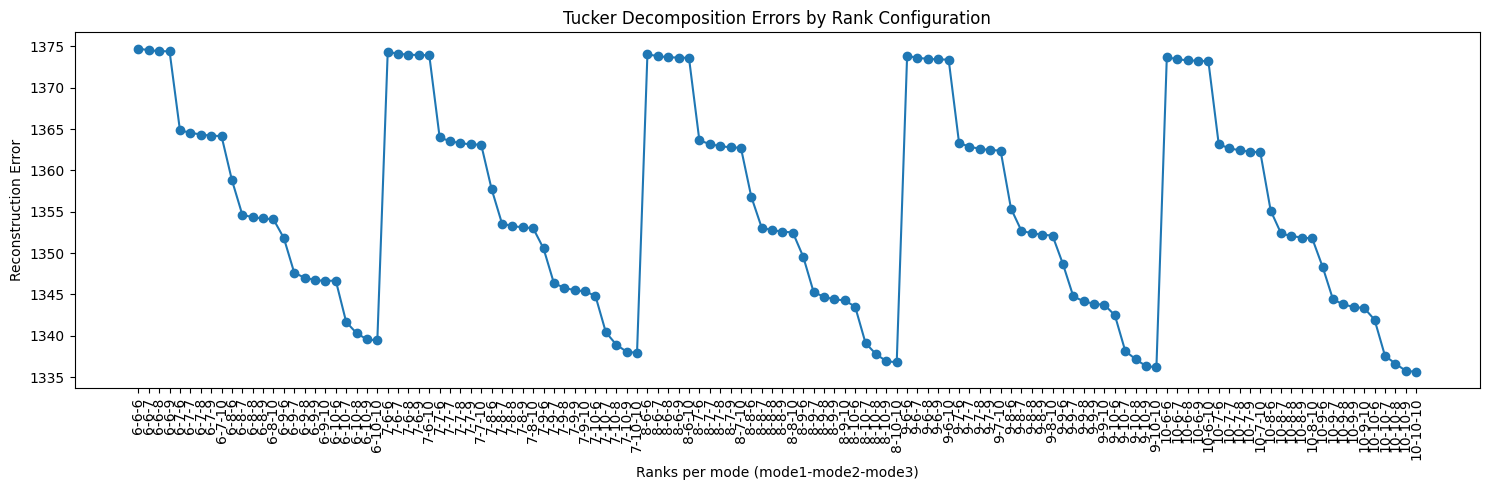

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.plot(label, error, marker='o')
plt.xticks(rotation=90)
plt.xlabel('Ranks per mode (mode1-mode2-mode3)')
plt.ylabel('Reconstruction Error')
plt.title('Tucker Decomposition Errors by Rank Configuration')
plt.tight_layout()
plt.show()

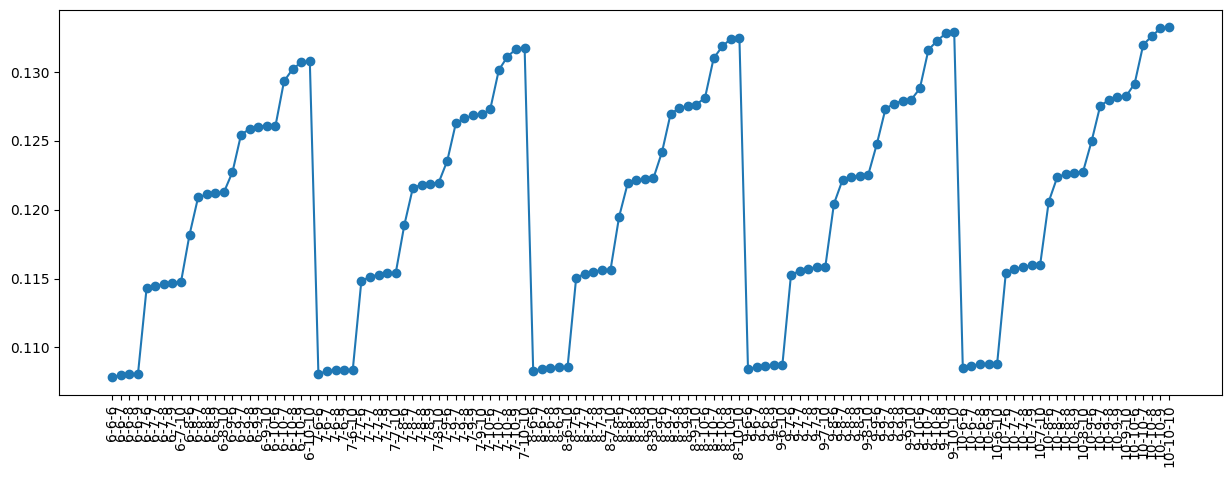

In [22]:
plt.figure(figsize=(15, 5))
plt.plot(label, variance, marker='o')
plt.xticks(rotation=90)
# plt.xlabel('Ranks per mode (mode1-mode2-mode3)')
# plt.ylabel('Reconstruction MAPE')
# plt.title('Tucker Decomposition Errors by Rank Configuration')
# plt.tight_layout()
plt.show()

In [23]:
min(variance)

0.1078460233905393